# 1d Data Gen

Data generated and saved to 'data.csv'.


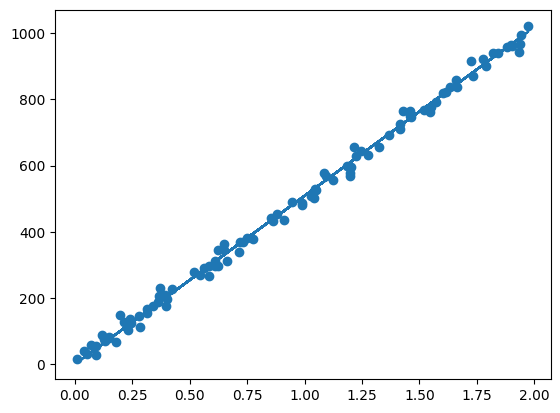

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility (optional)
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate random x values in some range (e.g., 0 to 2)
X = 2 * np.random.rand(n_samples)

# Generate noise (mean 0, with some standard deviation)
noise = np.random.randn(n_samples) * 20.0  # Adjust 50.0 to control noise level

# True relationship: y = 509*x + noise
y = 509 * X + noise

# Create a Pandas DataFrame
df = pd.DataFrame({
    'x': X,
    'y': y
})

pred = df.x * 509

plt.scatter(df.x, df.y)
plt.plot(df.x,pred)


# Save to CSV
df.to_csv('data_lin_reg.csv', index=False)

print("Data generated and saved to 'data.csv'.")


# Kaggle data
https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/data

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/house-rent-prediction-dataset")

print("Path to dataset files:", path)

c:\Users\hayk_\.conda\envs\thesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 82.4k/82.4k [00:00<00:00, 1.92MB/s]

Extracting files...
Path to dataset files: C:\Users\hayk_\.cache\kagglehub\datasets\iamsouravbanerjee\house-rent-prediction-dataset\versions\9


In [106]:
import os
import pandas as pd

# os.listdir(path)

In [107]:
# df = pd.read_csv(os.path.join(path, "House_Rent_Dataset.csv")) # /, \
df = pd.read_csv(os.path.join("House_Rent_Dataset.csv")) # /, \

# Basic EDA

In [4]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
assert df.isna().sum().sum() == 0, "Problem"

In [7]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [8]:
df_categ = df.select_dtypes("object")

In [9]:
df_categ.nunique()

Posted On              81
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Point of Contact        3
dtype: int64

In [10]:
df_categ.Floor.unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [53]:
COLS_TO_DROP = ["Area Locality", "Posted On", "Floor"]

# df_categ.drop(columns=COLS_TO_DROP, inplace=True)
df.drop(columns=COLS_TO_DROP, inplace=True)


In [54]:
import plotly.express as px

In [55]:
df.value_counts("Area Type")

KeyError: 'Area Type'

In [ ]:
px.bar(df.value_counts("Area Type"))

# Encoding categorical features
https://www.youtube.com/watch?v=589nCGeWG1w

## One Hot Encoding

In [10]:
df.value_counts("City")

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

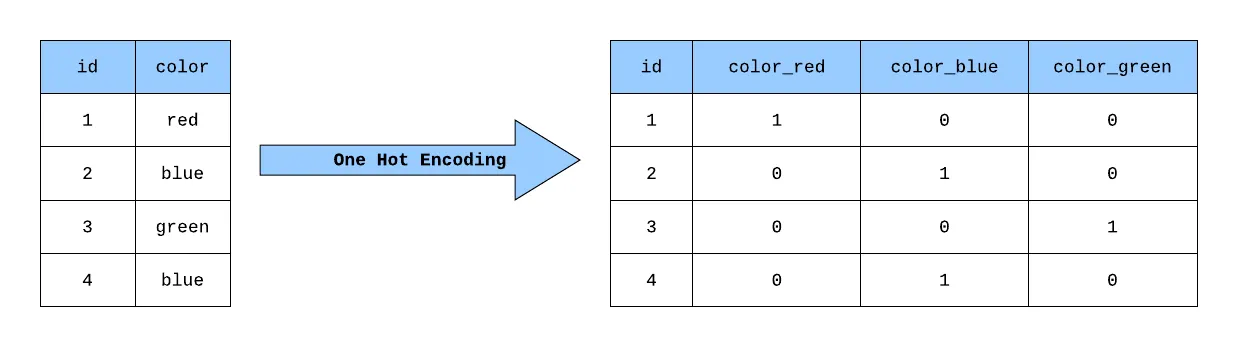

`pip install scikit-learn` or \
`conda install scikit-learn`

NOT SKLEARN

In [56]:
from sklearn.preprocessing import OneHotEncoder

# https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [57]:
city = df[["City"]]
city

KeyError: "None of [Index(['City'], dtype='object')] are in the [columns]"

In [13]:
ohe = OneHotEncoder(sparse_output=False)

ohe.fit(city)

OneHotEncoder(sparse_output=False)

In [58]:
city_transformed = ohe.transform(city)

In [59]:
city_transformed

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [60]:
pd.DataFrame(city_transformed)

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,0.0,1.0,0.0,0.0


In [61]:
ohe.get_feature_names_out()

array(['City_Bangalore', 'City_Chennai', 'City_Delhi', 'City_Hyderabad',
       'City_Kolkata', 'City_Mumbai'], dtype=object)

In [62]:
encoded_city = pd.DataFrame(city_transformed, columns=ohe.get_feature_names_out())
encoded_city

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
pd.concat([df, encoded_city], axis=1)

,BHK,Rent,Size,Furnishing Status,Bathroom,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Owner,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2.0,10000.0,1100.0,0.0,2.0,True,False,False,False,True,False,True,False,True,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20000.0,800.0,0.5,1.0,True,False,False,False,True,False,True,False,True,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,17000.0,1000.0,0.5,1.0,True,False,False,False,True,False,True,False,True,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,10000.0,800.0,0.0,1.0,True,False,False,False,True,False,True,False,True,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,7500.0,850.0,0.0,1.0,False,False,False,False,True,False,False,False,True,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,3.0,45000.0,1500.0,0.5,2.0,False,False,False,True,False,False,False,True,False,0.0,0.0,0.0,1.0,0.0,0.0
4745,2.0,15000.0,1000.0,0.0,2.0,False,False,False,True,False,False,False,False,True,0.0,0.0,0.0,1.0,0.0,0.0
3079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0
3966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0


### Problem with OHE

In [64]:
encoded_city

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,0.0,1.0,0.0,0.0


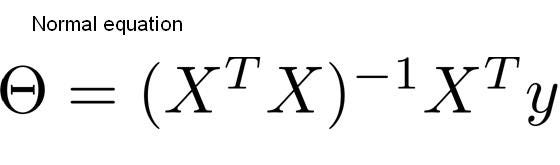

In [65]:
encoded_city.iloc[:, :-1]

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0
4742,0.0,0.0,0.0,1.0,0.0
4743,0.0,0.0,0.0,1.0,0.0
4744,0.0,0.0,0.0,1.0,0.0


In [66]:
1 - encoded_city.iloc[:, :-1].sum(axis=1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4741    0.0
4742    0.0
4743    0.0
4744    0.0
4745    0.0
Length: 4746, dtype: float64

In [67]:
sum_of_rest = encoded_city.iloc[:, :-1].sum(axis=1)

In [68]:
res = 1 - sum_of_rest

In [69]:
encoded_city.iloc[:, -1] == res

0       True
1       True
2       True
3       True
4       True
        ... 
4741    True
4742    True
4743    True
4744    True
4745    True
Length: 4746, dtype: bool

In [70]:
all(encoded_city.iloc[:, -1] == res)

True

In [71]:
import numpy as np

In [72]:
X_X_t = encoded_city @ encoded_city.T

In [73]:
np.linalg.inv(X_X_t)

LinAlgError: Singular matrix

In [42]:
np.linalg.det(X_X_t)

0.0

#### Removing duplicates

In [44]:
df.duplicated()

260

In [45]:
np.any(df.duplicated())

True

In [48]:
df = df[~df.duplicated()]

### Solution

In [49]:
ohe = OneHotEncoder(sparse_output=False, drop="first")

encoded_city_fixed = ohe.fit_transform(city)


In [74]:
pd.DataFrame(encoded_city_fixed, columns=ohe.get_feature_names_out())

NameError: name 'encoded_city_fixed' is not defined

### OHE with Pandas

In [75]:
pd.get_dummies(city)

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
4741,False,False,False,True,False,False
4742,False,False,False,True,False,False
4743,False,False,False,True,False,False
4744,False,False,False,True,False,False


In [76]:
pd.get_dummies(city, drop_first=True)

,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
4741,False,False,True,False,False
4742,False,False,True,False,False
4743,False,False,True,False,False
4744,False,False,True,False,False


## LabelEncoding

In [77]:
furnish = df["Furnishing Status"]

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

furnish_le = le.fit_transform(furnish)
furnish_le

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [79]:
df["Furnish_le"] = furnish_le

df

,BHK,Rent,Size,Furnishing Status,Bathroom,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Owner,Furnish_le
0,2,10000,1100,0.0,2,True,False,False,False,True,False,True,False,True,0
1,2,20000,800,0.5,1,True,False,False,False,True,False,True,False,True,1
2,2,17000,1000,0.5,1,True,False,False,False,True,False,True,False,True,1
3,2,10000,800,0.0,1,True,False,False,False,True,False,True,False,True,0
4,2,7500,850,0.0,1,False,False,False,False,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,0.5,2,False,False,False,True,False,False,True,False,True,1
4742,3,29000,2000,0.5,3,True,False,False,True,False,False,True,False,True,1
4743,3,35000,1750,0.5,3,False,False,False,True,False,False,True,False,False,1
4744,3,45000,1500,0.5,2,False,False,False,True,False,False,False,True,False,1


In [80]:
df.drop_duplicates("Furnishing Status")

,BHK,Rent,Size,Furnishing Status,Bathroom,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Owner,Furnish_le
0,2,10000,1100,0.0,2,True,False,False,False,True,False,True,False,True,0
1,2,20000,800,0.5,1,True,False,False,False,True,False,True,False,True,1
12,1,6500,250,1.0,1,False,False,False,False,True,False,False,False,True,2


In [81]:
df.value_counts("Area Type")

KeyError: 'Area Type'

In [82]:
area_type_le = le.fit_transform(df["Area Type"])


KeyError: 'Area Type'

In [60]:
df["area_type_le"] = area_type_le

<ipython-input-60-1c59e890a590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["area_type_le"] = area_type_le


In [35]:
df.drop_duplicates("Area Type")

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
3079,2,15000,1000,Built Area,Chennai,Furnished,Bachelors/Family,2,Contact Owner


### Problem with LE
Super Area - Built Area	= 2 * Carpet Area





## Solution - Ordinal Encoding

In [83]:
mappings = {
    "Unfurnished": 0,
    "Semi-Furnished": 0.5,
    "Furnished": 1
}

df["Furnishing OE"] = df["Furnishing Status"].map(mappings)

In [84]:
df

,BHK,Rent,Size,Furnishing Status,Bathroom,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Owner,Furnish_le,Furnishing OE
0,2,10000,1100,0.0,2,True,False,False,False,True,False,True,False,True,0,NaN
1,2,20000,800,0.5,1,True,False,False,False,True,False,True,False,True,1,NaN
2,2,17000,1000,0.5,1,True,False,False,False,True,False,True,False,True,1,NaN
3,2,10000,800,0.0,1,True,False,False,False,True,False,True,False,True,0,NaN
4,2,7500,850,0.0,1,False,False,False,False,True,False,False,False,True,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,0.5,2,False,False,False,True,False,False,True,False,True,1,NaN
4742,3,29000,2000,0.5,3,True,False,False,True,False,False,True,False,True,1,NaN
4743,3,35000,1750,0.5,3,False,False,False,True,False,False,True,False,False,1,NaN
4744,3,45000,1500,0.5,2,False,False,False,True,False,False,False,True,False,1,NaN


## Target Encoding (BE CAREFULL!!!)

https://www.youtube.com/watch?v=589nCGeWG1w

In [85]:
df["Point of Contact"].value_counts()

KeyError: 'Point of Contact'

In [86]:
df.groupby("Point of Contact")["Rent"].mean()

KeyError: 'Point of Contact'

`pip install category_encoders`
https://contrib.scikit-learn.org/category_encoders/

In [87]:
!pip install category_encoders

  Using cached category_encoders-2.8.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
Using cached category_encoders-2.8.0-py3-none-any.whl (85 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


  You can safely remove it manually.


In [88]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl (11.0 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.8.0 requires scikit-learn>=1.6.0, but you have scikit-learn 1.5.2 which is incompatible.


In [89]:
!pip install category_encoders==2.5.0


  Using cached category_encoders-2.5.0-py2.py3-none-any.whl.metadata (7.3 kB)
Using cached category_encoders-2.5.0-py2.py3-none-any.whl (69 kB)
  Attempting uninstall: category_encoders
    Found existing installation: category_encoders 2.8.0
    Uninstalling category_encoders-2.8.0:
      Successfully uninstalled category_encoders-2.8.0


In [90]:
import category_encoders as ce

col = "Point of Contact"

target_enc = ce.TargetEncoder(cols=[col])

target_enc.fit(df[col], df['Rent'])

df['Point_of_Coutact_encoded'] = target_enc.transform(df[col])


c:\Users\hayk_\.conda\envs\100\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning:

Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327

c:\Users\hayk_\.conda\envs\100\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning:

Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327



KeyError: 'Point of Contact'

In [44]:
df

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Furnishing OE,Point_of_Coutact_encoded
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.0,16704.206468
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.5,16704.206468
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.5,16704.206468
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0.0,16704.206468
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,0.0,16704.206468
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,0.5,16704.206468
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,0.5,16704.206468
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,0.5,73481.158927
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,0.5,73481.158927


In [33]:
df.groupby("Point of Contact")["Rent"].mean()

Point of Contact
Contact Agent      73481.158927
Contact Builder     5500.000000
Contact Owner      16704.206468
Name: Rent, dtype: float64

## Some preprocessing

In [34]:
df["Area Type"].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

In [ ]:
df = df[df["Area Type"] != "Built Area"]

df["Area Type"].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Name: count, dtype: int64

In [36]:
df["Point of Contact"].value_counts()

Point of Contact
Contact Owner      3214
Contact Agent      1529
Contact Builder       1
Name: count, dtype: int64

In [37]:
df = df[df["Point of Contact"] != "Contact Builder"]

## Putting all together

In [ ]:
df.drop(columns=["Point_of_Coutact_encoded"], inplace=True)

KeyError: "['Point_of_Coutact_encoded'] not found in axis"

In [91]:
COLS_OHE = ["Area Type", "City", "Tenant Preferred", \
            "Point of Contact"]


In [92]:
data_OHE = pd.get_dummies(df[COLS_OHE], drop_first=True)

KeyError: "None of [Index(['Area Type', 'City', 'Tenant Preferred', 'Point of Contact'], dtype='object')] are in the [columns]"

In [44]:
df = pd.concat([df, data_OHE], axis=1)

In [45]:
df.drop(columns=COLS_OHE, inplace=True)

In [93]:
mappings = {
    "Unfurnished": 0,
    "Semi-Furnished": 0.5,
    "Furnished": 1
}
df["Furnishing Status"] = df["Furnishing Status"].map(mappings)

In [47]:
df

,Posted On,BHK,Rent,Size,Floor,Area Locality,Furnishing Status,Bathroom,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Owner
0,2022-05-18,2,10000,1100,Ground out of 2,Bandel,0.0,2,True,False,False,False,True,False,True,False,True
1,2022-05-13,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",0.5,1,True,False,False,False,True,False,True,False,True
2,2022-05-16,2,17000,1000,1 out of 3,Salt Lake City Sector 2,0.5,1,True,False,False,False,True,False,True,False,True
3,2022-07-04,2,10000,800,1 out of 2,Dumdum Park,0.0,1,True,False,False,False,True,False,True,False,True
4,2022-05-09,2,7500,850,1 out of 2,South Dum Dum,0.0,1,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Bandam Kommu,0.5,2,False,False,False,True,False,False,True,False,True
4742,2022-05-15,3,29000,2000,1 out of 4,"Manikonda, Hyderabad",0.5,3,True,False,False,True,False,False,True,False,True
4743,2022-07-10,3,35000,1750,3 out of 5,"Himayath Nagar, NH 7",0.5,3,False,False,False,True,False,False,True,False,False
4744,2022-07-06,3,45000,1500,23 out of 34,Gachibowli,0.5,2,False,False,False,True,False,False,False,True,False


# Linear Regression with Scikit-learn

# ToDo - Make sure we drop irrelevant features

In [108]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [235]:
df = df[["BHK", "Rent",	"Size",	"Bathroom"]]

KeyError: "None of [Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')] are in the [columns]"

In [236]:
X = df
y = df["Rent"]

KeyError: 'Rent'

In [111]:
X.head(1)

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2


In [112]:
y.head(1)

0    10000
Name: Rent, dtype: int64

In [232]:
from sklearn.linear_model import LinearRegression


In [237]:
X

,x,y
0,0.614857,5.970402
1,0.804116,6.569000
2,0.255724,4.768404
3,0.410476,5.230966
4,0.579893,6.443665
...,...,...
195,0.828652,6.758405
196,0.313983,5.581204
197,0.790160,6.779955
198,0.453186,4.863989


In [238]:
model = LinearRegression()
model.fit(X, y)

ValueError: Found input variables with inconsistent numbers of samples: [200, 3]

In [115]:
print("Intercept:", model.intercept_)
print("Coefficient(s):", model.coef_)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df

Intercept: 7.275957614183426e-12
Coefficient(s): [-1.47712008e-11  1.00000000e+00 -6.34955518e-16  1.68842647e-12]


,Feature,Coefficient
0,BHK,-1.477120e-11
1,Rent,1.000000e+00
2,Size,-6.349555e-16
3,Bathroom,1.688426e-12


In [116]:
pd.options.display.float_format = '{:.6f}'.format


In [117]:
coef_df

,Feature,Coefficient
0,BHK,-0.000000
1,Rent,1.000000
2,Size,-0.000000
3,Bathroom,0.000000


### Fixing issue

In [118]:
X

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1
...,...,...,...,...
4741,2,15000,1000,2
4742,3,29000,2000,3
4743,3,35000,1750,3
4744,3,45000,1500,2


In [134]:
df = df[["BHK", "Rent",	"Size_min_max",	"Bathroom_min_max"]]

In [135]:
X = df.drop(columns=["Rent"])
y = df["Rent"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient(s):", model.coef_)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df

Intercept: -11307.073990724202
Coefficient(s): [ -1546.91473937 193684.89736545 245192.05243168]


,Feature,Coefficient
0,BHK,-1546.914739
1,Size_min_max,193684.897365
2,Bathroom_min_max,245192.052432


### 21 Jan

### Interpreting coefficents

**Note**
- In practice, we would first of all evaluate our model, and only then try to interpret it.

$y_{initial} = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2$

Increase $x_1$ by 1

$y_{new} = \theta_0 + \theta_1 * (x_1 + 1) + \theta_2 * x_2 = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + \theta_1$

$y_{new} - y_{initial} = \theta_1$

In [120]:
coef_df.sort_values("Coefficient", ascending=False)


,Feature,Coefficient
2,Bathroom,27243.561381
1,Size,24.240913
0,BHK,-1546.914739


**Size = 39.747316**
- For each additional square meter (or whichever unit “Size” represents), the rent on average increases by about 39.75 units of currency, holding other factors constant. (c. p)

**City_Hyderabad = -15172.606293**
- Being in Hyderabad (vs. baseline) on average leads to a 15172.61 decrease in predicted rent on average c. p.

**Note**
- Ceteris paribus (a Latin phrase, meaning "other things equal"))


**Important**: We should not just sort the values, but rather sort them based on their absolute value

In [121]:
coef_df.sort_values("Coefficient", key=abs, ascending=False)


,Feature,Coefficient
2,Bathroom,27243.561381
0,BHK,-1546.914739
1,Size,24.240913


Why is size so not important, it does not make any sense

In [122]:
df[["Size", "Bathroom"]].describe()

,Size,Bathroom
count,4746.000000,4746.000000
mean,967.490729,1.965866
std,634.202328,0.884532
min,10.000000,1.000000
25%,550.000000,1.000000
50%,850.000000,2.000000
75%,1200.000000,2.000000
max,8000.000000,10.000000


# Feature Scaling

In [ ]:
10 - 100

30 

30 - 10 = 20

20 / 90

min -> 0
max -> 1

In [123]:
px.histogram(df, ["Size", "Bathroom"])

## Min Max Scaling

In [124]:
px.histogram(df, "Size")

In [125]:
def min_max_scale(df, col):
    return (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df["Size_min_max"] = min_max_scale(df, "Size")
df["Bathroom_min_max"] = min_max_scale(df, "Bathroom")

px.histogram(df, ["Size_min_max", "Bathroom_min_max"])


C:\Users\hayk_\AppData\Local\Temp\ipykernel_27180\1506725833.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hayk_\AppData\Local\Temp\ipykernel_27180\1506725833.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['Size', 'Bathroom']])

scaled_data = scaler.transform(df[['Size', 'Bathroom']])

df[['Size_minmax', 'Bathroom_minmax']] = scaled_data

df.iloc[:,-4:]

C:\Users\hayk_\AppData\Local\Temp\ipykernel_27180\710089726.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Size_min_max,Bathroom_min_max,Size_minmax,Bathroom_minmax
0,0.136421,0.111111,0.136421,0.111111
1,0.098874,0.000000,0.098874,0.000000
2,0.123905,0.000000,0.123905,0.000000
3,0.098874,0.000000,0.098874,0.000000
4,0.105131,0.000000,0.105131,0.000000
...,...,...,...,...
4741,0.123905,0.111111,0.123905,0.111111
4742,0.249061,0.222222,0.249061,0.222222
4743,0.217772,0.222222,0.217772,0.222222
4744,0.186483,0.111111,0.186483,0.111111


## Standard Scaling

In [128]:
def standard_scale(df, col):
    """
    Standardize a single column to have mean 0 and std dev 1:
         z = (x - mean) / std
    """
    return (df[col] - df[col].mean()) / df[col].std()

df["Size_std_manual"] = standard_scale(df, "Size")
df["Bathroom_std_manual"] = standard_scale(df, "Bathroom")


C:\Users\hayk_\AppData\Local\Temp\ipykernel_27180\2451075589.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hayk_\AppData\Local\Temp\ipykernel_27180\2451075589.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df[['Size', 'Bathroom']])

scaled_data = scaler.transform(df[['Size', 'Bathroom']])

df[['Size_standard', 'Bathroom_standard']] = scaled_data

df.iloc[:, -4:]


,Size_std_manual,Bathroom_std_manual,Size_standard,Bathroom_standard
0,0.208938,0.038590,0.208960,0.038594
1,-0.264097,-1.091952,-0.264125,-1.092067
2,0.051260,-1.091952,0.051265,-1.092067
3,-0.264097,-1.091952,-0.264125,-1.092067
4,-0.185257,-1.091952,-0.185277,-1.092067
...,...,...,...,...
4741,0.051260,0.038590,0.051265,0.038594
4742,1.628044,1.169132,1.628216,1.169255
4743,1.233848,1.169132,1.233978,1.169255
4744,0.839652,0.038590,0.839741,0.038594


In [132]:
px.histogram(df, ["Size_std_manual", "Bathroom_std_manual"])

# Train Test Split

In [150]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import plotly.express as px
import plotly.graph_objects as go


In [151]:
np.random.seed(509)

num_samples = 100
theta_0_true = 4
theta_1_true = 3

X = np.random.rand(num_samples, 1)
y = theta_0_true + theta_1_true * X
df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})
df

,x,y
0,0.755873,6.267619
1,0.250878,4.752635
2,0.705838,6.117513
3,0.377670,5.133011
4,0.722901,6.168702
...,...,...
95,0.384609,5.153826
96,0.804502,6.413507
97,0.626121,5.878364
98,0.838703,6.516109


In [152]:
px.scatter(df, "x", "y")

### SETTING THE SEED IS IMPORTANT

In [206]:
import numpy as np

np.random.seed(1)

print(np.random.randint(1,100))
print(np.random.randint(1,100))

38
13


#### Adding noise

In [222]:
np.random.seed(50004)

X = np.random.rand(200, 1)
y = theta_0_true + theta_1_true * X + np.random.randn(200, 1) / 3
df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})

In [223]:
x_vals = np.linspace(0, 1, 100)
y_vals = theta_0_true + theta_1_true * x_vals

fig = px.scatter(df, "x", "y")

fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='True Line'))

fig.show()



#### First work with a few points

In [224]:
df_small = df.sort_values("x").head(3)
df_small

,x,y
193,0.000035,4.266323
5,0.007691,3.423349
167,0.009319,3.936942


In [225]:
# show fig but xlim to 0.012
fig.update_layout(xaxis=dict(range=[df_small.x.min()-0.01, df_small.x.max()+0.01]), 
                  yaxis=dict(range=[df_small.y.min()-0.01, df_small.y.max()+0.01]))
fig.show()

In [226]:
X = df_small[["x"]]
y = df_small["y"]

#### 10th degree polynomial

In [ ]:
x 
3
4
5
6
7

theta_0 * 1 + theta_1 * x + theta_2 * x^2 + theta_3 * x_3

ax^2 + bx + c

In [231]:
data = pd.DataFrame()

data["intercept"] = np.ones(7)
data["x"] = np.array([1,2,3,4,5,6,7])
data["x2"] = data["x"] ** 2
data["x3"] = data["x"] ** 3

data

,intercept,x,x2,x3
0,1.000000,1,1,1
1,1.000000,2,4,8
2,1.000000,3,9,27
3,1.000000,4,16,64
4,1.000000,5,25,125
5,1.000000,6,36,216
6,1.000000,7,49,343


In [246]:
from sklearn.preprocessing import PolynomialFeatures

X = df_small[["x"]]
y = df_small["y"]

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

# Polynomial regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

LinearRegression()

In [249]:
model_poly.coef_

array([-1.15943521e-09, -4.64230870e+02,  4.58301265e+04,  7.81205706e+02])

In [247]:
1 * -1.159 + 8 + -4.64 + 8^^2 4.58301265e

,x
193,0.000035
5,0.007691
167,0.009319


In [250]:
pd.DataFrame(X_poly), y

(         0        1        2        3
 0 1.000000 0.000035 0.000000 0.000000
 1 1.000000 0.007691 0.000059 0.000000
 2 1.000000 0.009319 0.000087 0.000001,
 193   4.266323
 5     3.423349
 167   3.936942
 Name: y, dtype: float64)

In [256]:
from sklearn.preprocessing import PolynomialFeatures

X = df_small[["x"]]
y = df_small["y"]

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

# X = pd.DataFrame(np.array([1,2,3]))
# Polynomial regression
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

# print(X)
# print(pd.DataFrame(X_poly))

model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Predictions for polynomial regression
x_vals_poly = poly.transform(x_vals)
y_pred_poly = model_poly.predict(x_vals_poly)

# Linear regression
model_line = LinearRegression()
model_line.fit(X, y)

# Predictions for linear regression
y_pred_line = model_line.predict(x_vals)

# Plotting
fig = px.scatter(df_small, "x", "y", title="Actual Data, True Line, Line Fit, and Poly Fit")
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=theta_0_true + theta_1_true * x_vals.flatten(), mode='lines', name='True Line'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=y_pred_poly.flatten(), mode='lines', name='Poly Fit'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=y_pred_line.flatten(), mode='lines', name='Line Fit'))
fig.show()


c:\Users\hayk_\.conda\envs\100\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

c:\Users\hayk_\.conda\envs\100\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [257]:
X_all = df[["x"]]
y_all = df["y"]

# predict the models on all data
y_pred_line_all = model_line.predict(X_all)
y_pred_poly_all = model_poly.predict(poly.transform(X_all))

# plot the predictions
fig = px.scatter(df, "x", "y", title="Actual Data, Line Fit, Poly Fit")
fig.add_trace(go.Scatter(x=df["x"], y=y_pred_line_all.flatten(), mode='markers', name='Line Fit'))
fig.add_trace(go.Scatter(x=df["x"], y=y_pred_poly_all.flatten(), mode='markers', name='Poly Fit'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=theta_0_true + theta_1_true * x_vals.flatten(), mode='lines', name='True Line'))

fig.show()


#### Errors

In [258]:
small_line_mse = mean_squared_error(y, model_line.predict(X))
small_poly_mse = mean_squared_error(y, model_poly.predict(poly.transform(X)))

all_line_mse = mean_squared_error(y_all, model_line.predict(X_all))
all_poly_mse = mean_squared_error(y_all, model_poly.predict(poly.transform(X_all)))

print(f"Small Data MSE - Line: {small_line_mse:.5f}")
print(f"Small Data MSE - Poly: {small_poly_mse:.5f}")
print()
print(f"All Data MSE - Line: {all_line_mse:.5f}")
print(f"All Data MSE - Poly: {all_poly_mse:.5f}")

Small Data MSE - Line: 0.06360
Small Data MSE - Poly: 0.00000

All Data MSE - Line: 1197.68639
All Data MSE - Poly: 370576183.33468


### Solution - split the data

In [259]:
num_samples = 30

X = np.random.rand(num_samples, 1)
y = theta_0_true + theta_1_true * X + np.random.randn(num_samples, 1) / 3

df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})

X = df[["x"]]
y = df["y"]
px.scatter(df, "x", "y")


In [260]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=509)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [261]:
# Linear regression
model_line = LinearRegression()
model_line.fit(X_train, y_train)

y_train_pred_line = model_line.predict(X_train)
y_test_pred_line = model_line.predict(X_test)

# Polynomial regression
model_poly = LinearRegression()
poly = PolynomialFeatures(degree=40)
poly.fit(X_train)

model_poly.fit(poly.transform(X_train), y_train)

y_train_pred_poly = model_poly.predict(poly.transform(X_train))

y_test_pred_poly = model_poly.predict(poly.transform(X_test))

#### Just a line

In [262]:
print("Train MSE - Line:", mean_squared_error(y_train, y_train_pred_line))
print("Test MSE - Line:", mean_squared_error(y_test, y_test_pred_line))
print()
print("Train MSE - Poly:", mean_squared_error(y_train, y_train_pred_poly))
print("Test MSE - Poly:", mean_squared_error(y_test, y_test_pred_poly))

import plotly.express as px

# Bar plots for Train and Test MSE
mse_data = {
    'Data': ['Train', 'Test'],
    'Line': [mean_squared_error(y_train, y_train_pred_line), mean_squared_error(y_test, y_test_pred_line)],
    'Poly': [mean_squared_error(y_train, y_train_pred_poly), mean_squared_error(y_test, y_test_pred_poly)]
}

mse_df = pd.DataFrame(mse_data)

fig = px.bar(mse_df, x='Data', y=['Line', 'Poly'], barmode='group', title='Train and Test MSE for Line and Poly Models')
fig.update_layout(yaxis_title='Mean Squared Error')
fig.show()

Train MSE - Line: 0.08503000584047282
Test MSE - Line: 0.06293227999615157

Train MSE - Poly: 0.006204590907118421
Test MSE - Poly: 378832.97000561305


In [265]:
# x_vals = np.linspace()

# Sort the dataframe by 'x' values
df_sorted = df.sort_values(by='x')

# Extrapolate model to predict the entire range of x values
y_pred_line = model_line.predict(df_sorted[['x']])
y_pred_poly = model_poly.predict(poly.transform(df_sorted[['x']]))

fig = px.scatter(df_sorted, "x", "y", title="Actual Data, Line Fit, Poly Fit")
fig.add_trace(go.Scatter(x=df_sorted["x"], y=y_pred_line.flatten(), mode='lines', name='Line Fit'))
fig.add_trace(go.Scatter(x=df_sorted["x"], y=y_pred_poly.flatten(), mode='lines', name='Poly Fit'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=theta_0_true + theta_1_true * x_vals.flatten(), mode='lines', name='True Line'))

fig.show()


In [266]:
fig.update_layout(xaxis=dict(range=[X.min(), X.max()]), 
                  yaxis=dict(range=[y.min(), y.max()]))

# Underfitting and Overfitting

Underfitting:
- Շարքային Սողոմոնյան - https://www.youtube.com/watch?v=pv_4MVcjEik
Overfitting:
- Եթե կլոր ա ուրեմն մեջինը քառակուսի ա - https://www.youtube.com/watch?v=7arnxebkEUU 



## Examples

### Overfitting: Astrological Predictions in Ancient Civilizations**
**Historical Backdrop:**
From Babylonian times onward, countless astrologers meticulously charted the positions of celestial bodies, connecting them with floods, famines, victories in war, and the births of royals.

**Why it’s Overfitting:**
- Ancient astrologers often looked at every tiny “coincidence” between a planetary alignment and historical events, building extremely specific rules. (E.g., “When Mars is in Taurus and the moon is half full, there will be a great harvest if the newborn prince is left-handed!”)
- These detailed “models” fit prior observations too well, often capturing noise and coincidences rather than robust truths.

**Moral of the Story:** 
Squeezing meaning out of every alignment of the stars is like overfitting on random noise in a dataset!

### Underfitting: “Bleeding” as a Medieval Medical Treatment
**Historical Backdrop:**
For centuries, a common medical practice in Europe was bloodletting—draining blood to “rebalance the humors” and cure ailments from headaches to fevers.

**Why it’s Underfitting:**
- The medical “model” at the time was extremely simplistic: “Something’s wrong? Let’s remove blood.”
- They applied the same one-size-fits-all approach to all sorts of diseases, ignoring the huge variability between different medical conditions (and patients).
- Because the underlying theory was so rudimentary (the four humors concept), the “model” rarely fit the real complexity of physiology.
  
**Moral of the Story:**
 When your theory is too general and ignores most of the nuanced details, you’re underfitting the complexity of reality (and might end up making people worse).

### Overfitting: Your Uncle’s Hyper-Specific Sports Superstitions
**Everyday Fun Example:**
Maybe you have an uncle who insists on wearing the exact same (unwashed) socks during every big game, needs to place the remote exactly 5 inches from the TV, and can only eat “lucky peanuts” if the score is tied.

**Why it’s Overfitting:**
- He’s discovered a string of coincidences: whenever he did those specific rituals, his team happened to win.
- He’s latched onto every tiny detail—like someone building an overly complex machine-learning model that memorizes all the noise in the training data.
- The moment “new data” arrives—i.e., the team loses despite the lucky peanuts—his model is proven to have no real predictive power.

**Moral of the Story:** 
If your “model” requires that many hyper-specific conditions to “succeed,” it’s probably not robust!

## Demo

In [272]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ------------------------------------------------------------------------------
# 1. Generate Synthetic Data (True degree = 3)
# ------------------------------------------------------------------------------
np.random.seed(509)
poly_degree = 20

# True polynomial function (3rd degree)
def true_function(x):
    # Example: y = 1 + 2x + 3x^2 + 4x^3, plus random noise
    return 1 + 2*x + 3*x**2 + 4*x**3 + np.random.normal(0, 20, size=x.shape)

def true_function_without_noise(x):
    return 1 + 2*x + 3*x**2 + 4*x**3

# Generate data
N = 100
X = np.linspace(-3, 3, N).reshape(-1, 1)
y = true_function(X.ravel())

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# ------------------------------------------------------------------------------
# 2. Fit Polynomial Models of Degree 1 to 10 & Record MSE
# ------------------------------------------------------------------------------
degrees = range(1, poly_degree)
train_mses = []
test_mses = []
polynomial_predictions = {}  # Store predictions for plotting

# A dense grid for plotting model predictions
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

for d in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)
    X_plot_poly  = poly.transform(X_plot)
    
    # Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on train and test
    y_train_pred = model.predict(X_train_poly)
    y_test_pred  = model.predict(X_test_poly)
    
    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test,  y_test_pred)
    
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    
    # Store predictions for the plotting slider
    y_plot_pred = model.predict(X_plot_poly)
    polynomial_predictions[d] = y_plot_pred

# ------------------------------------------------------------------------------
# 3. Plot MSE vs. Polynomial Degree (Line Chart)
# ------------------------------------------------------------------------------
df_mse = {
    'Degree': list(degrees),
    'Train MSE': train_mses,
    'Test MSE': test_mses
}

fig_mse = px.line(
    df_mse, 
    x='Degree', 
    y=['Train MSE', 'Test MSE'], 
    markers=True,
    title="Train & Test MSE vs. Polynomial Degree"
)
fig_mse.update_layout(
    xaxis = dict(dtick=1),
    yaxis_title="MSE"
)

# ------------------------------------------------------------------------------
# 4. Interactive Plot: Data + Fitted Polynomials (Slider)
# ------------------------------------------------------------------------------
# We'll create a figure with:
#   - Scatter of the training data
#   - Scatter of the test data (optional, or we can mark them differently)
#   - A line that updates for each polynomial degree using frames.

# Base scatter (training data)
scatter_train = go.Scatter(
    x=X_train.ravel(), 
    y=y_train, 
    mode='markers',
    name='Train Data',
    marker=dict(color='blue', size=6)
)

# Optionally, scatter for test data
scatter_test = go.Scatter(
    x=X_test.ravel(), 
    y=y_test, 
    mode='markers',
    name='Test Data',
    marker=dict(color='red', size=6)
)

# We'll build frames for each polynomial degree
frames = []
for d in degrees:
    # Create a line trace for the polynomial prediction at degree d
    line_pred = go.Scatter(
        x=X_plot.ravel(),
        y=polynomial_predictions[d],
        mode='lines',
        line=dict(width=3),
        name=f"Degree {d} fit"
    )
    frames.append(
        go.Frame(
            data=[scatter_train, scatter_test, line_pred],
            name=str(d)
        )
    )

# Initial line (degree=1 by default)
init_line = go.Scatter(
    x=X_plot.ravel(),
    y=polynomial_predictions[1],
    mode='lines',
    line=dict(width=3),
    name=f"Degree 1 fit"
)

# Build the figure with the first frame's data
fig_poly = go.Figure(
    data=[scatter_train, scatter_test, init_line],
    layout=go.Layout(
        title="Polynomial Fits (Degree Slider)",
        xaxis=dict(title="X"),
        yaxis=dict(title="y"),
        updatemenus=[  # Slider button settings
            dict(
                type="buttons",
                showactive=False,
                x=1.15,
                y=1.15,
                xanchor="right",
                yanchor="top",
                buttons=[
                    dict(label="Play",
                         method="animate",
                         args=[None, 
                               dict(frame=dict(duration=500, redraw=True),
                                    fromcurrent=True,
                                    transition=dict(duration=300)
                                   )
                              ]
                        )
                ]
            )
        ],
        # We'll define sliders next
        sliders=[{
            'currentvalue': {'prefix': 'Degree: ', 'xanchor': 'right'},
            'steps': [
                {
                    'label': str(d),
                    'method': 'animate',
                    'args': [[str(d)], 
                             dict(mode='immediate',
                                  frame=dict(duration=300, redraw=True),
                                  transition=dict(duration=300))]
                }
                for d in degrees
            ]
        }]
    ),
    frames=frames
)

# add the true function to fig_poly
true_y = true_function_without_noise(X_plot.ravel())
fig_poly.add_trace(go.Scatter(x=X_plot.ravel(), y=true_y, mode='lines', name='True Function'))




# ------------------------------------------------------------------------------
# 5. Show the plots
# ------------------------------------------------------------------------------
fig_poly.show()
fig_mse.show()


## Bias Variance decomposition
https://scott.fortmann-roe.com/docs/BiasVariance.html

In [ ]:
x_vals

# Evaluation

## Classics
Go to PDF

## Pearson and Spearman Correlation

In [181]:
### Pearson's vs Spearman's Correlation in Python
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Generate sample data
np.random.seed(42)
x = np.linspace(1, 100, 100)
y_linear = 2 * x + np.random.normal(0, 10, size=len(x))  # Linear relationship
y_monotonic = np.log(x) + np.random.normal(0, 0.2, size=len(x))  # Monotonic but not linear
y_outlier = y_linear.copy()
y_outlier[-1] += 50_900  # Add an outlier

In [182]:
# Calculate correlation values
pearson_linear = pearsonr(x, y_linear)[0]
spearman_linear = spearmanr(x, y_linear)[0]

pearson_monotonic = pearsonr(x, y_monotonic)[0]
spearman_monotonic = spearmanr(x, y_monotonic)[0]

pearson_outlier = pearsonr(x, y_outlier)[0]
spearman_outlier = spearmanr(x, y_outlier)[0]

In [183]:
import plotly.express as px
import plotly.graph_objects as go

# Pearson's linear correlation example
fig1 = px.scatter(x=x, y=y_linear, title=f"Linear Relationship | Pearson - {pearson_linear:.2f} | Spearman - {spearman_linear:.2f}")
fig1.add_trace(go.Scatter(x=x, y=y_linear, mode='markers'))
fig1.update_layout(xaxis_title="X", yaxis_title="Y")
fig1.show()

# Spearman's monotonic relationship example
fig2 = px.scatter(x=x, y=y_monotonic, title=f"Monotonic Relationship | Pearson - {pearson_monotonic:.2f} | Spearman - {spearman_monotonic:.2f}")
fig2.add_trace(go.Scatter(x=x, y=y_monotonic, mode='markers'))
fig2.update_layout(xaxis_title="X", yaxis_title="Y (Rank-based)")
fig2.show()

# Pearson with outlier example
fig3 = px.scatter(x=x, y=y_outlier, title=f"Outlier | Pearson - {pearson_outlier:.2f} | Spearman - {spearman_outlier:.2f}")
fig3.add_trace(go.Scatter(x=x, y=y_outlier, mode='markers'))
fig3.update_layout(xaxis_title="X", yaxis_title="Y")
fig3.show()

# Spearman on sine wave
x = np.linspace(0, 1 * np.pi, 100)
y = np.sin(x)

pearson_sine = pearsonr(x, y)[0]
spearman_sine = spearmanr(x, y)[0]

fig4 = px.scatter(x=x, y=y, title=f"Sine Wave | Pearson - {pearson_sine:.2f} | Spearman - {spearman_sine:.2f}")
fig4.add_trace(go.Scatter(x=x, y=y, mode='markers'))
fig4.update_layout(xaxis_title="X", yaxis_title="Y")
fig4.show()


## Pearson's Correlation (r)
- Measures the **linear relationship** between two variables.
- Assumes data is normally distributed.
- **Sensitive to outliers**.
- Values range from -1 to +1:
  - **+1**: Perfect positive linear correlation.
  - **-1**: Perfect negative linear correlation.
  - **0**: No linear correlation.

### Formula:
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

## Spearman's Correlation (ρ)
- Measures the **monotonic relationship** between two variables.
- Does **not assume normality** (non-parametric).
- **Robust against outliers**.
- Values range from -1 to +1:
  - **+1**: Perfect positive monotonic relationship.
  - **-1**: Perfect negative monotonic relationship.
  - **0**: No monotonic relationship.

### Formula:
$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$
- $d_i$: Difference between ranks of $x_i$ and $y_i$.
- $n$: Number of pairs.

## When to Use:
| **Criteria**             | **Pearson**              | **Spearman**             |
|---------------------------|--------------------------|--------------------------|
| **Linear Relationship**   | Yes                     | No                      |
| **Monotonic Relationship**| No                      | Yes                     |
| **Outlier Sensitivity**   | High                    | Low                     |
| **Normality Assumption**  | Yes                     | No                      |

---
"""


## Visual evaluation + Codes

In [184]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [185]:
# https://github.com/HaykTarkhanyan/coder_moder/blob/main/ml/regression_evaluation_report.py
def evaluate_regression(actual, predictions,
    model_name=None, filename=None, notes=None,
    return_metrics=False, show_plots=False,
    show_metrics=True, plots=False, round_digits=3):
    """
    Function to evaluate a regression model.

    .. warning::
        Assumes that ``scipy``, ``sklearn``, and ``matplotlib`` are installed
        in your environment.

    This function:
        - Prints R2, MAE, MSE, RMSE metrics.
        - Prints Kendall's tau, Pearson's R, Spearman's rho correlation metrics.
        - Plots actual vs. predicted values.
        - Plots residuals vs. predicted values.
        - Plots distribution of residuals.
        - Plots predicted vs. actual distribution.
        - Saves results to file (if specified).
        - Returns metrics as a dictionary (if specified).
    Args:
        actual (array-like): Ground-truth target values.
        predictions (array-like): Model predictions.
        model_name (str, optional): Name of the model (for display/record-keeping).
        filename (str, optional): Path to an HTML file to save the results.
        notes (str, optional): Additional notes to include in the saved file (if `filename` is provided).
        return_metrics (bool, optional): If True, returns a dictionary of metrics. Defaults to False.
        show_plots (bool, optional): If True, calls `plt.show()` for each figure. Defaults to False.
        show_metrics (bool, optional): If True, prints the metrics and correlations to stdout. Defaults to True.
        plots (bool, optional): If True, generates plots. Defaults to False.
        round_digits (int, optional): Number of digits to round the metrics. Defaults to 3.

    Returns:
        dict or None: 
            A dictionary of computed metrics if `return_metrics=True`, otherwise None.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
    from scipy.stats import kendalltau, pearsonr, spearmanr
    from datetime import datetime
    from io import BytesIO
    import base64
    # Ensure inputs are NumPy arrays
    actual = np.array(actual)
    predictions = np.array(predictions)

    def save_figure_to_file(fig):
        """
        Helper function:
        Convert a Matplotlib figure to a base64-encoded PNG for embedding in HTML.
        """
        tmpfile = BytesIO()
        fig.savefig(tmpfile, format='png')
        encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
        return encoded

    # 1. Calculate regression metrics
    r2 = round(r2_score(actual, predictions), round_digits)
    mae = round(mean_absolute_error(actual, predictions), round_digits)
    mape = round(mean_absolute_percentage_error(actual, predictions), round_digits)
    mse = round(mean_squared_error(actual, predictions), round_digits)
    rmse = round(np.sqrt(mean_squared_error(actual, predictions)), round_digits)

    # 2. Calculate correlation metrics
    pearson = round(pearsonr(actual, predictions)[0], round_digits)
    spearman = round(spearmanr(actual, predictions)[0], round_digits)
    kendall = round(kendalltau(actual, predictions)[0], round_digits)

    # 3. Print metrics if needed
    if show_metrics:
        print(f"Model: {model_name or 'N/A'}")
        print(f"R2: {r2}")
        print(f"MAE: {mae}")
        print(f"MAPE: {mape}")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"Pearson Correlation: {pearson}")
        print(f"Spearman Rho: {spearman}")
        print(f"Kendall Tau: {kendall}")

    # 4. Generate plots if requested
    if plots:
        residuals = actual - predictions

        # (a) Predicted vs. Actual
        fig1 = plt.figure()
        plt.scatter(actual, predictions, edgecolor='k', alpha=0.7)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Predicted vs. Actual")
        # add a diagonal line
        plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2)
        if show_plots:
            plt.show()
        prediction_vs_actual = save_figure_to_file(fig1)
        plt.close(fig1)

        # (b) Residuals vs. Predicted
        fig2 = plt.figure()
        plt.scatter(predictions, residuals, edgecolor='k', alpha=0.7)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel("Predicted")
        plt.ylabel("Residual")
        plt.title("Residuals vs. Predicted")
        if show_plots:
            plt.show()
        residuals_vs_predicted = save_figure_to_file(fig2)
        plt.close(fig2)

        # (c) Distribution of Residuals
        fig3 = plt.figure()
        plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
        plt.xlabel("Residual")
        plt.ylabel("Count")
        plt.title("Distribution of Residuals")
        if show_plots:
            plt.show()
        residuals_distribution = save_figure_to_file(fig3)
        plt.close(fig3)

        # (d) Distribution of Predicted vs. Actual
        fig4 = plt.figure()
        plt.hist(actual, bins=30, alpha=0.5, label="Actual", edgecolor='k')
        plt.hist(predictions, bins=30, alpha=0.5, label="Predicted", edgecolor='k')
        plt.xlabel("Value")
        plt.ylabel("Count")
        plt.title("Distribution of Predicted vs. Actual")
        plt.legend()
        if show_plots:
            plt.show()
        predicted_vs_actual_distribution = save_figure_to_file(fig4)
        plt.close(fig4)

    # 5. Save results to file (HTML) if requested
    if filename:
        with open(filename, "w") as f:
            f.write(f"<html><body>\n")
            f.write(f"<h2>Report generated: {datetime.now()}</h2>\n")
            if model_name:
                f.write(f"<h2>Model Name: {model_name}</h2>\n")

            if notes:
                f.write(f"<h3>Notes:</h3>\n<p>{notes}</p>\n")

            f.write("<h3>Metrics</h3>\n")
            f.write(f"<b>R2:</b> {r2} <br>\n")
            f.write(f"<b>MAE:</b> {mae} <br>\n")
            f.write(f"<b>MAPE:</b> {mape} <br>\n")
            f.write(f"<b>MSE:</b> {mse} <br>\n")
            f.write(f"<b>RMSE:</b> {rmse} <br>\n")

            f.write("<h3>Correlations</h3>\n")
            f.write(f"Pearson: {pearson} <br>\n")
            f.write(f"Spearman: {spearman} <br>\n")
            f.write(f"Kendall Tau: {kendall} <br>\n")

            if plots:
                f.write("<h3>Plots</h3>\n")
                f.write(f'<img src="data:image/png;base64,{prediction_vs_actual}"><br><br>\n')
                f.write(f'<img src="data:image/png;base64,{residuals_vs_predicted}"><br><br>\n')
                f.write(f'<img src="data:image/png;base64,{residuals_distribution}"><br><br>\n')
                f.write(f'<img src="data:image/png;base64,{predicted_vs_actual_distribution}"><br><br>\n')

            f.write("</body></html>\n")

    # 6. Optionally return a dictionary of metrics
    if return_metrics:
        return {
            "model_name": model_name,
            "notes": notes,
            "r2": r2,
            "mae": mae,
            "mape": mape,
            "mse": mse,
            "rmse": rmse,
            "pearson": pearson,
            "spearman": spearman,
            "kendall": kendall
        }


Model: Linear Regression
R2: 0.851
MAE: 14.434
MAPE: 1.377
MSE: 352.374
RMSE: 18.772
Pearson Correlation: 0.923
Spearman Rho: 0.846
Kendall Tau: 0.683


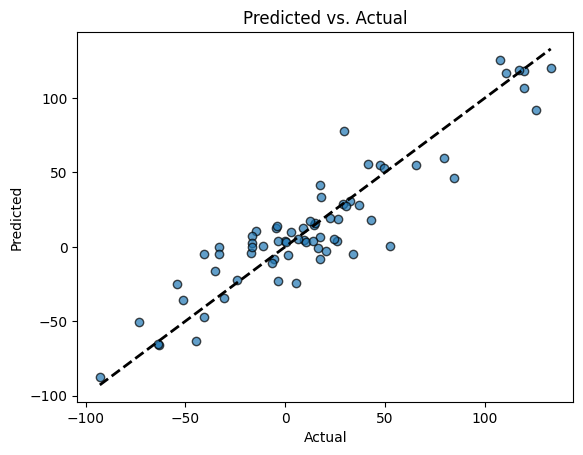

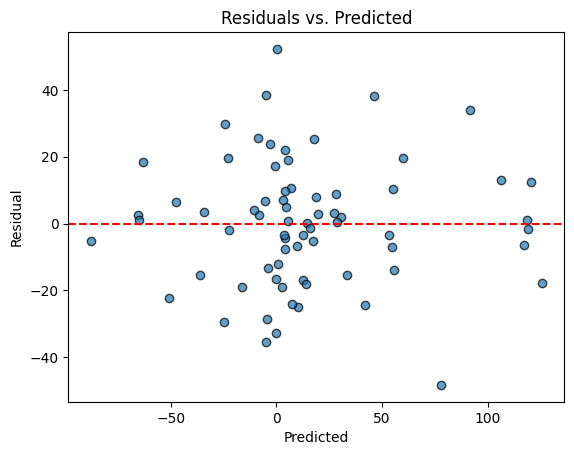

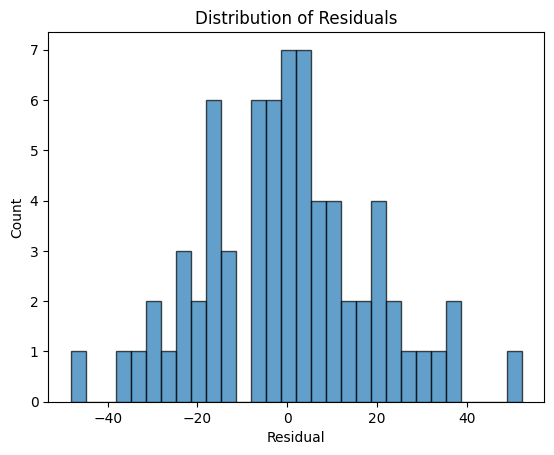

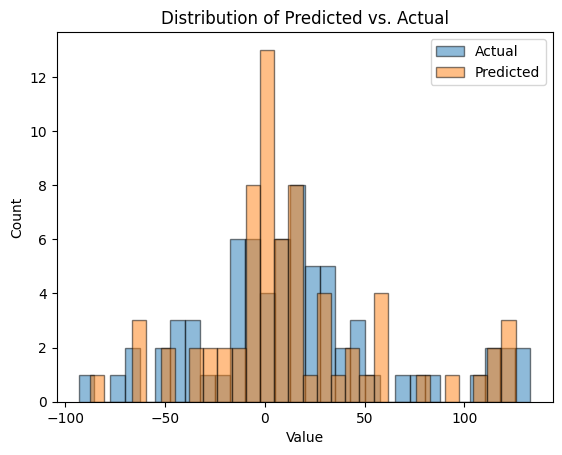

In [186]:
evaluate_regression(y_train, y_train_pred, model_name="Linear Regression", filename="report.html", show_plots=True, plots=True)

Model: Linear Regression
R2: -1.17
MAE: 33.684
MAPE: 1.183
MSE: 6155.855
RMSE: 78.459
Pearson Correlation: 0.121
Spearman Rho: 0.623
Kendall Tau: 0.526


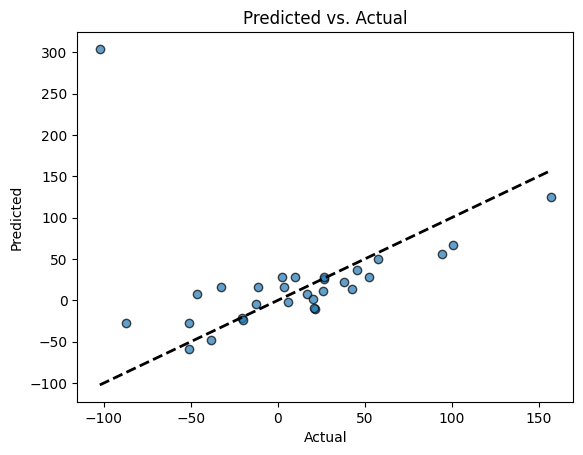

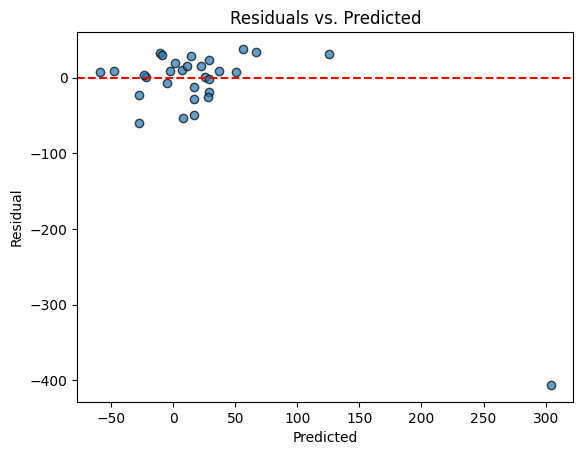

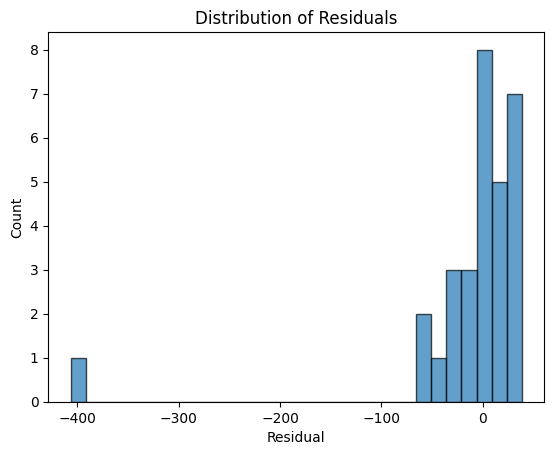

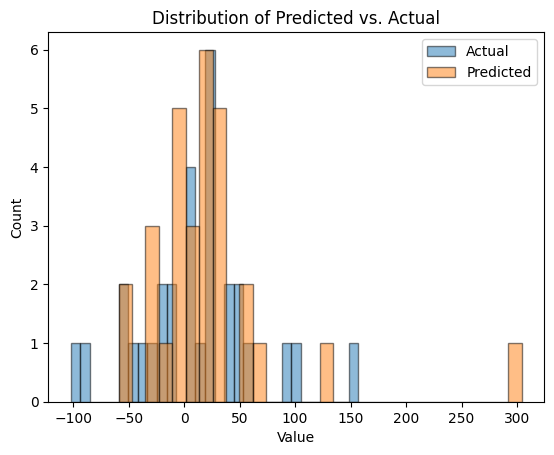

In [187]:
evaluate_regression(y_test, y_test_pred, model_name="Linear Regression", filename="report.html", show_plots=True, plots=True)

# Cross Validation
https://scikit-learn.org/1.5/modules/cross_validation.html

In [273]:
1 2 3 4 5

1 2 3 4 | 5
1 2 3 5 | 4
1 2 4 5 | 3

SyntaxError: invalid syntax (4146206910.py, line 1)

# Regulaization